# (sFigure5)-Analysis of CD8+ and CD4+ T Cell Subset Distributions.

In [144]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_raw_data(adata, groupby_column, values):
    adata.obs['count'] = adata.obs.groupby(groupby_column).cumcount()

    pivot_df = adata.obs.pivot(index=groupby_column, columns='count', values=values)

    pivot_df.fillna(value=pd.NA, inplace=True)

    return pivot_df.T

def plot_exhausted_score(adata, 
                         groupby: str = '', 
                         plot_text: str = '',
                         type_color_rna: dict = '',
                         values: str ='',
                         x_ticks_plot:bool = True,
                         jitter_number: int = 0,
                         figsize:tuple = (6, 3),
                         ecolor_used:bool = True,
                         ylabels:str ='',
                         save:bool = False,
                         save_pathway:str = '',
                        ):
    processed_data = process_raw_data(adata, groupby, values)

    fig, ax = plt.subplots(figsize=figsize)
    xbar = np.arange(len(processed_data.columns))

    sorted_columns = processed_data.mean().sort_values(ascending=False).index
    processed_data = processed_data[sorted_columns]

    color_list_dot = [type_color_rna[celltype] for celltype in processed_data.columns]

    if ecolor_used==True:
        plt.bar(x=xbar, 
            height=processed_data.mean(), 
            yerr=processed_data.sem(), 
            width=0.8, color=color_list_dot, 
            capsize=4, zorder=1, alpha=0.5, linewidth=2,
            edgecolor=color_list_dot,
            error_kw={'elinewidth': None, 'capthick': None})
    else:
            plt.bar(x=xbar, 
            height=processed_data.mean(), 
            yerr=processed_data.sem(), 
            width=0.8, color=color_list_dot, 
            capsize=4, zorder=1, alpha=0.5, linewidth=2,
            edgecolor=color_list_dot,
            ecolor='#00000000',
            error_kw={'elinewidth': None, 'capthick': None})
    
    bw = 0.4

    random_samples_df = pd.DataFrame(index=range(jitter_number))

    for col in processed_data.columns:
        non_nan_values = processed_data[col].dropna().drop_duplicates()
        if len(non_nan_values) > 0:
            if len(non_nan_values) < jitter_number:
                random_samples_df[col] = non_nan_values.tolist() + [np.nan] * (jitter_number - len(non_nan_values))
            else:
                random_samples_df[col] = non_nan_values.sample(n=jitter_number, replace=False).tolist()

    for cols in range(len(processed_data.columns.to_numpy())):
        if jitter_number<=len(random_samples_df.iloc[:, cols].drop_duplicates()):
            plt.scatter(x=np.linspace(xbar[cols]-bw/2, xbar[cols]+bw/2, jitter_number),
                    y=random_samples_df.iloc[:, cols].dropna(), s=10, 
                    color=color_list_dot[cols], zorder=1, alpha=0.8,
                    marker='o')
        else:
            plt.scatter(x=np.linspace(xbar[cols]-bw/2, xbar[cols]+bw/2, len(random_samples_df.iloc[:, cols].dropna().drop_duplicates())),
                    y=random_samples_df.iloc[:, cols].dropna().drop_duplicates(), s=10, 
                    color=color_list_dot[cols], zorder=1, alpha=0.8,
                    marker='o')
            
    plt.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_title(plot_text, fontsize=13, fontweight='bold')
    
    if x_ticks_plot==True:
        plt.xticks(xbar, processed_data.columns)
        plt.xticks(rotation=90, fontsize=12)
    else:
        ax.set_xticklabels([])
    plt.ylabel(ylabels, fontsize=13, fontweight='bold')

    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    
    if save == True:
        plt.savefig(save_pathway, dpi=300,bbox_inches='tight')

            
    plt.show()


In [146]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Plot

In [ ]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')


In [148]:
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

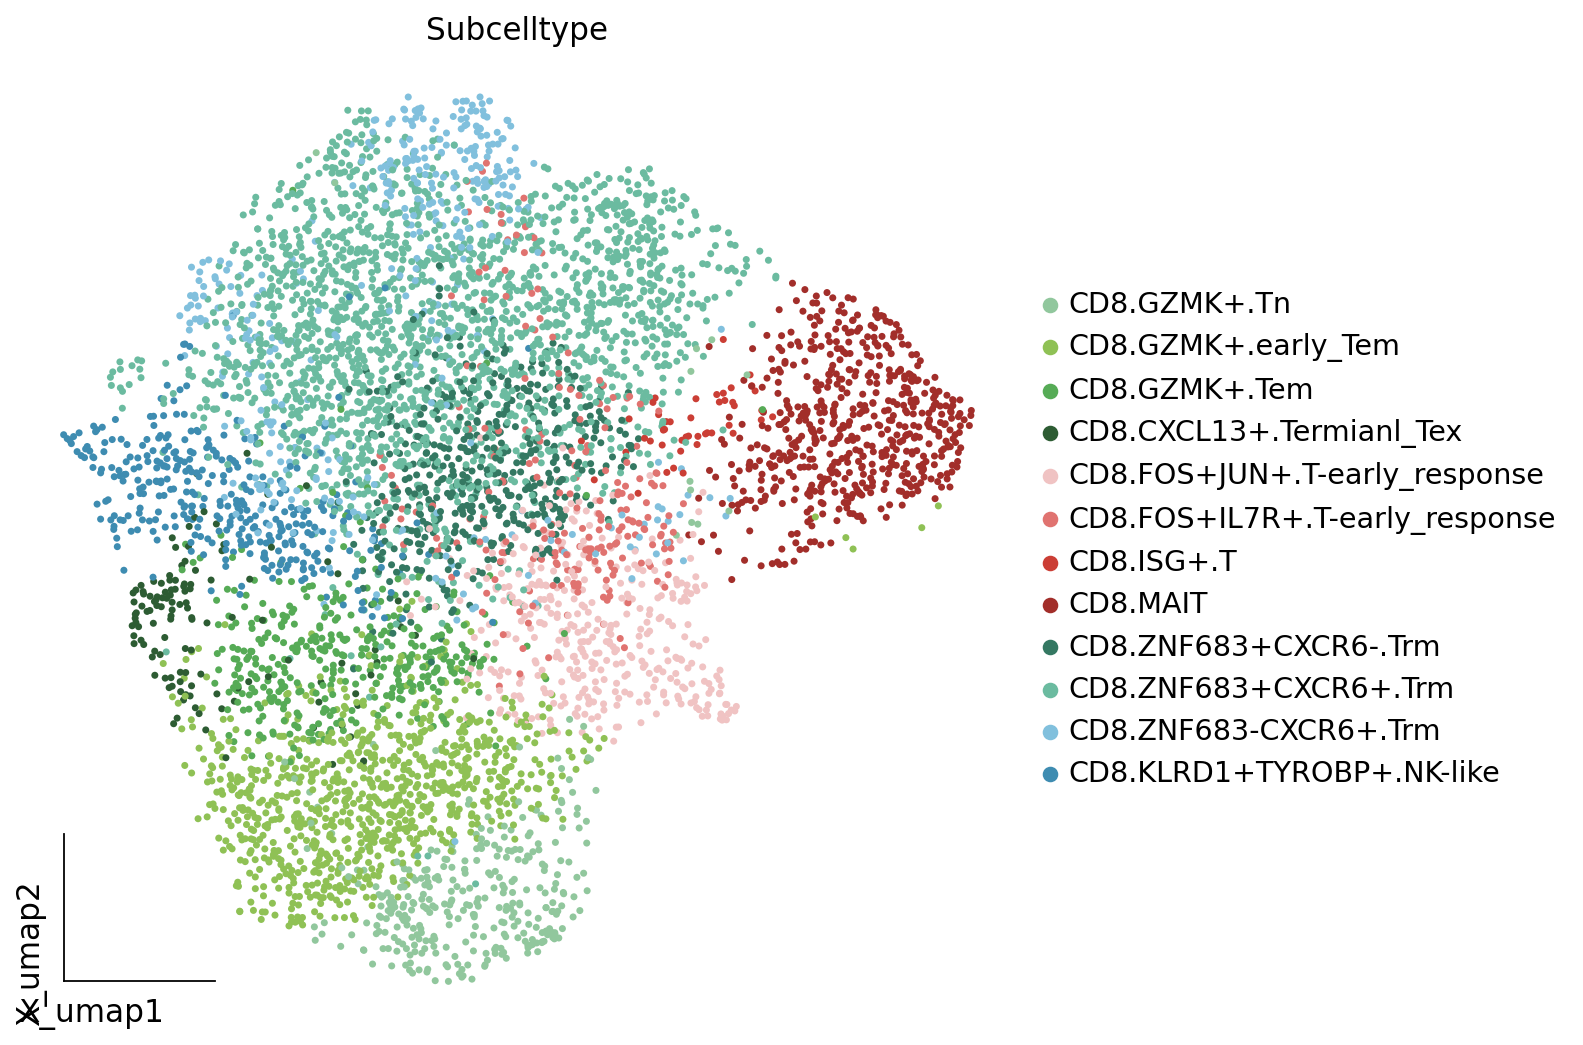

In [149]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD8,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

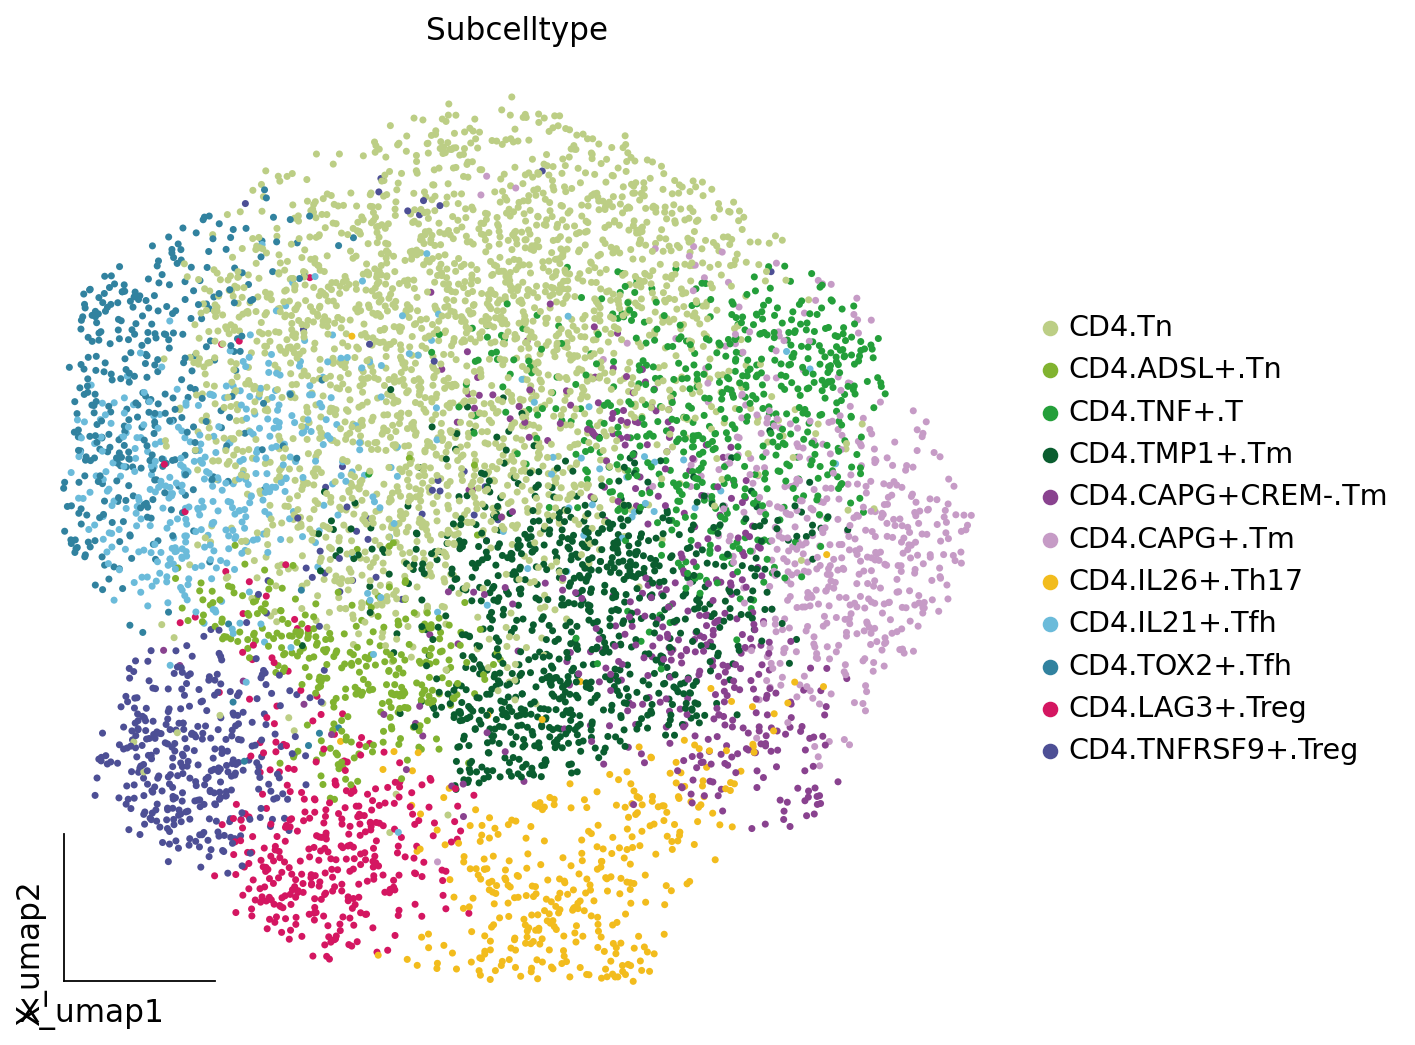

In [150]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD4,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

In [151]:
type_color_rna={
    'Neg':'#1f77b4',
    'Pos':'#ff7f0e',
    'Para':'#279e68',
}

In [152]:
adata.obs

,Group_number,Sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,major_celltype,Person,T/NK_celltype,T/NK_type,Subcelltype,composition
AAACCTGGTACACCGC-1_0,DYM,Pos,1557,1557,3217.0,85.0,2.642213,0,0,3,NK/T cell,Pos_1,CD4.Tn,CD4,CD4.TMP1+.Tm,0.158385
AAACGGGGTACAGCAG-1_0,DYM,Pos,1740,1740,4942.0,123.0,2.488871,0,0,17,NK/T cell,Pos_1,CD4.Trm,CD4,CD4.TNF+.T,0.108696
AAAGCAATCGAACTGT-1_0,DYM,Pos,1182,1182,2615.0,120.0,4.588910,0,0,1,NK/T cell,Pos_1,CD4.Tn,CD4,CD4.TMP1+.Tm,0.158385
AAAGTAGGTACATCCA-1_0,DYM,Pos,1568,1568,4066.0,395.0,9.714707,0,0,1,NK/T cell,Pos_1,CD4.Tn,CD4,CD4.TMP1+.Tm,0.158385
AACCATGAGAAGGACA-1_0,DYM,Pos,2689,2689,10370.0,1425.0,13.741562,0,0,15,NK/T cell,Pos_1,CD4.Tem,CD4,CD4.CAPG+CREM-.Tm,0.136646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCCATGACATC-1_11,PC09,Para,1517,1517,3312.0,188.0,5.676328,5,0,2,NK/T cell,Para_2,CD4.Tfh,CD4,CD4.IL21+.Tfh,0.060659
TTTATGCGTTAAGAAC-1_11,PC09,Para,1416,1416,4009.0,235.0,5.861811,5,0,6,NK/T cell,Para_2,CD4.Tn,CD4,CD4.TNF+.T,0.230503
TTTCCTCTCAAGATCC-1_11,PC09,Para,1605,1605,3515.0,188.0,5.348506,5,0,8,NK/T cell,Para_2,CD4.Th17,CD4,CD4.IL26+.Th17,0.031196
TTTGGTTAGTACGCCC-1_11,PC09,Para,401,401,737.0,181.0,24.559023,5,0,0,NK/T cell,Para_2,CD4.Trm,CD4,CD4.CAPG+.Tm,0.076256


In [153]:
adata = adata_CD8.copy()
adata.obs['composition'] =''
df = pd.DataFrame()
for i in set(adata.obs['Subcelltype']):
    for j in set(adata.obs['Person']):
        adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i),'composition']=len(adata.obs[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)].index)/len(adata.obs[adata.obs['Person']==j].index)*100
        if len(adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)])!=0:
            df = df.append(adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)].sample())
adata_used = adata[df.index,:]
adata_used

View of AnnData object with n_obs × n_vars = 126 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'composition'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

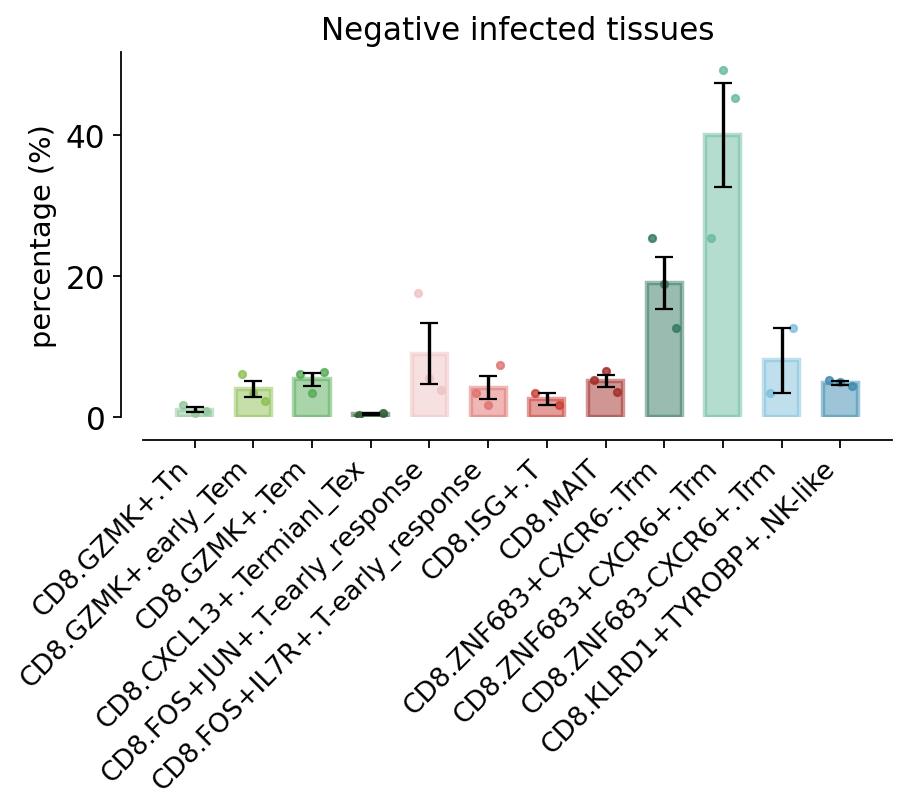

In [154]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Neg'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
#plt.ylim(0, 0.5)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Negative infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5A.png', dpi=300,bbox_inches = 'tight')

In [155]:
help(ov.pl.bardotplot)

Help on function bardotplot in module omicverse.pl._single:

bardotplot(adata, groupby, color, figsize=(8, 3), return_values=False, fontsize=12, xlabel='', ylabel='', xticks_rotation=90, ax=None, bar_kwargs=None, scatter_kwargs=None)



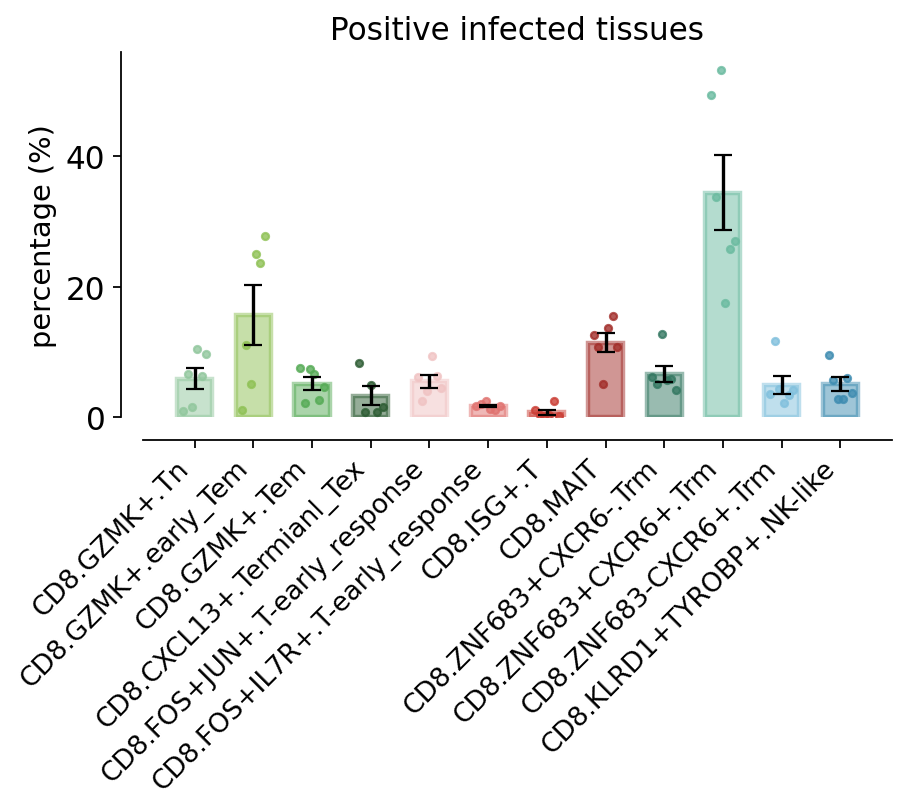

In [156]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Pos'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
#plt.ylim(0, 0.5)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Positive infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5B.png', dpi=300,bbox_inches = 'tight')

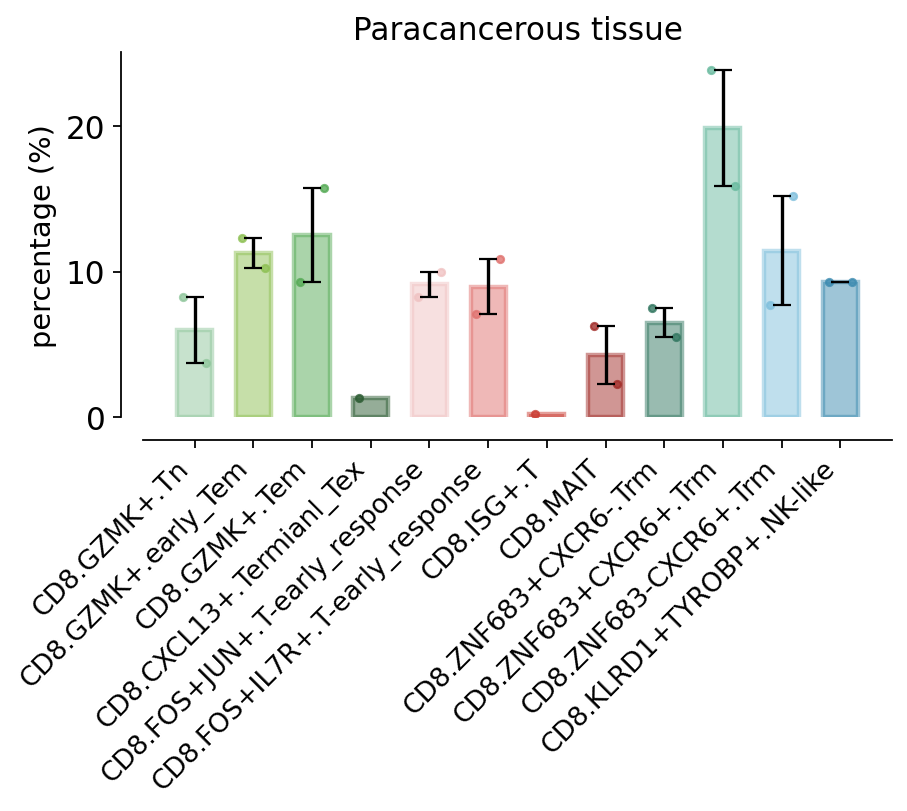

In [158]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Para'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Paracancerous tissue')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5C.png', dpi=300,bbox_inches = 'tight')

In [159]:
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')

adata = adata_CD4.copy()
adata.obs['composition'] =''
df = pd.DataFrame()
for i in set(adata.obs['Subcelltype']):
    for j in set(adata.obs['Person']):
        adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i),'composition']=len(adata.obs[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)].index)/len(adata.obs[adata.obs['Person']==j].index)*100
        if len(adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)])!=0:
            df = df.append(adata.obs.loc[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)].sample())
adata_used = adata[df.index,:]
adata_used

View of AnnData object with n_obs × n_vars = 116 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'composition'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

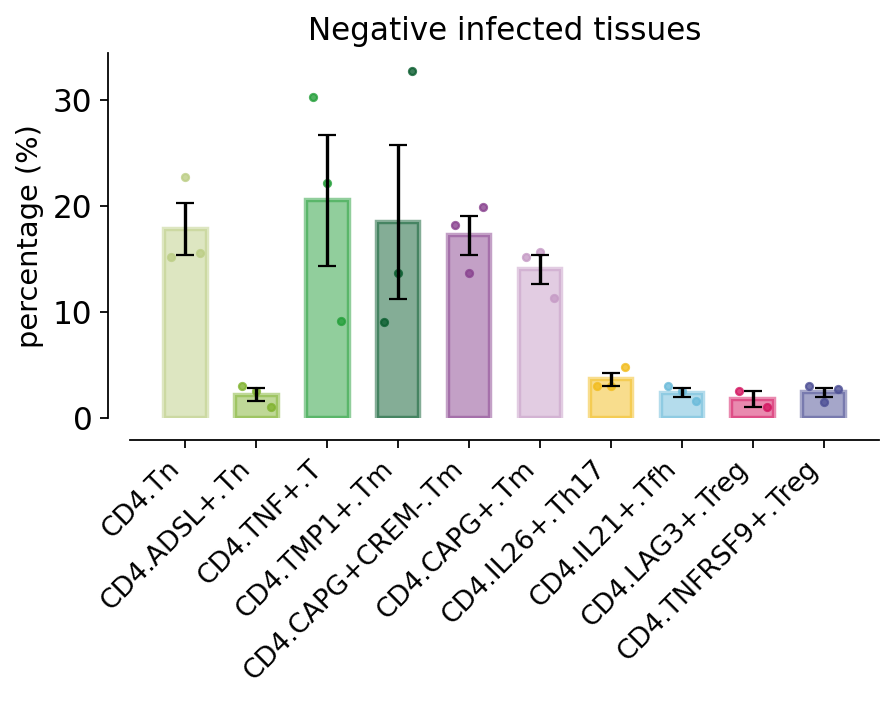

In [160]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Neg'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
#plt.ylim(0, 0.5)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Negative infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5D.png', dpi=300,bbox_inches = 'tight')

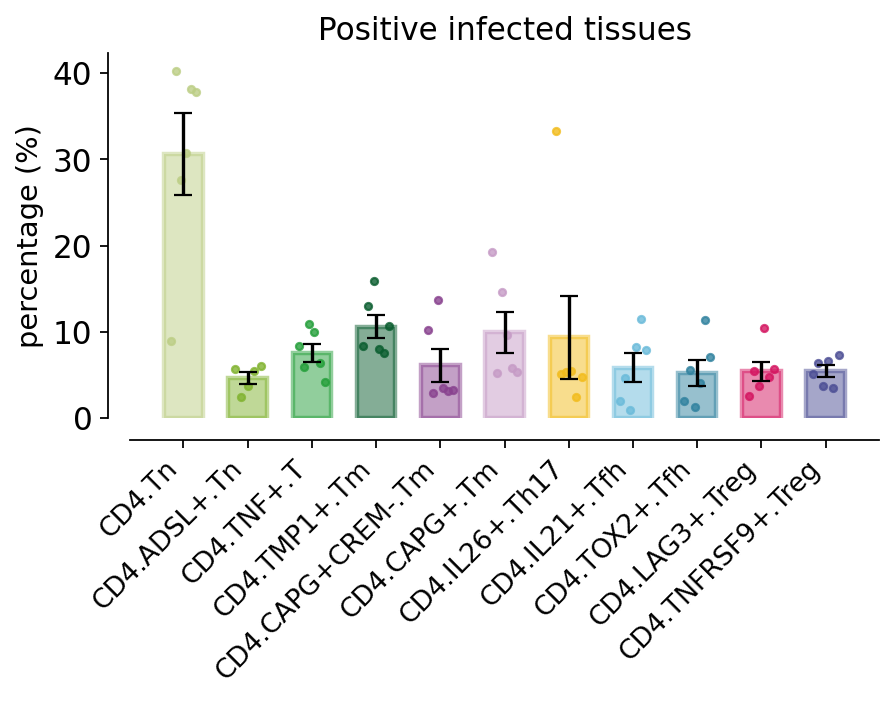

In [161]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Pos'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
#plt.ylim(0, 0.5)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Positive infected tissues')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5E.png', dpi=300,bbox_inches = 'tight')

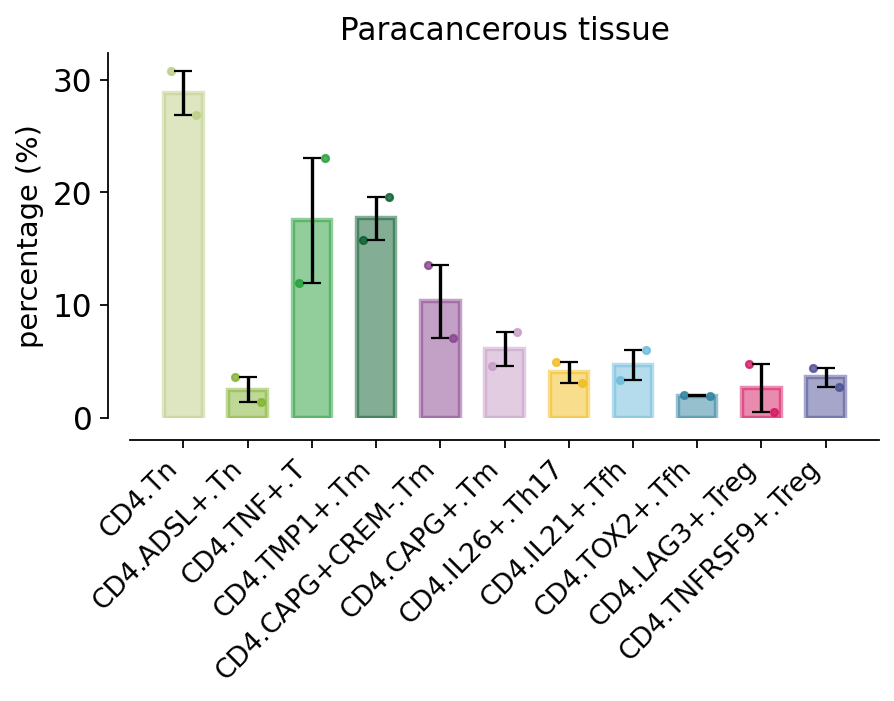

In [162]:
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(adata_used[adata_used.obs['Sample']=='Para'],groupby='Subcelltype',color='composition',figsize=(6,2),
          ylabel='percentage (%)',ax=ax,
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
#plt.ylim(0, 0.5)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_title('Paracancerous tissue')
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.savefig('Gastric/Figure/sFigure5/sFigure_5F.png', dpi=300,bbox_inches = 'tight')

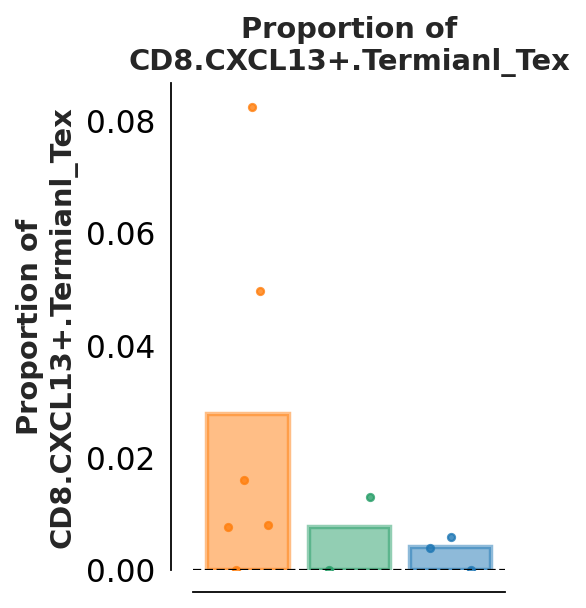

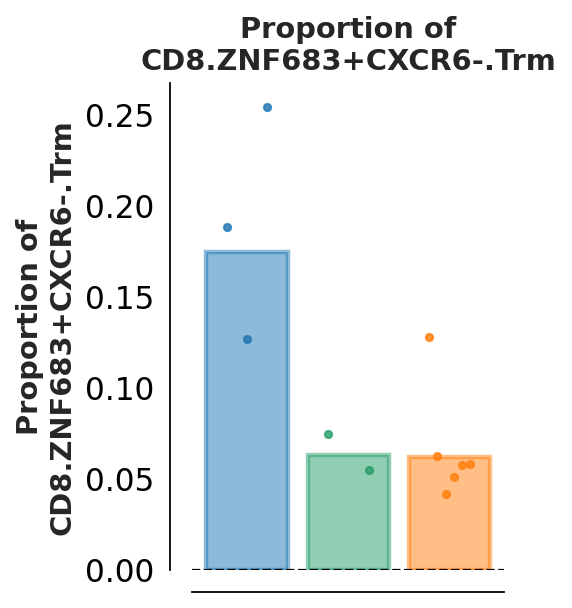

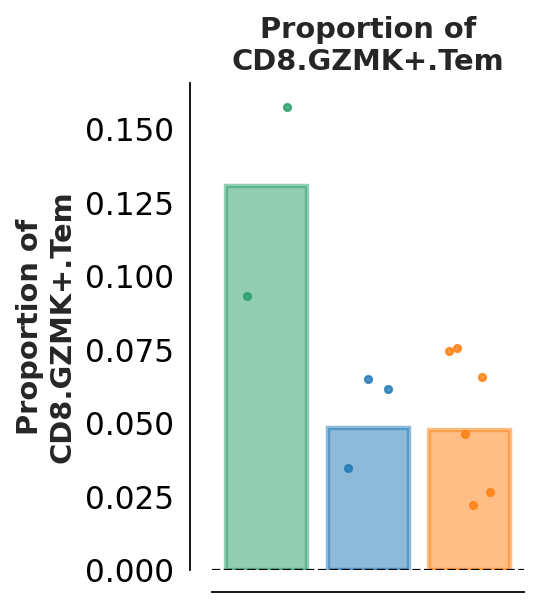

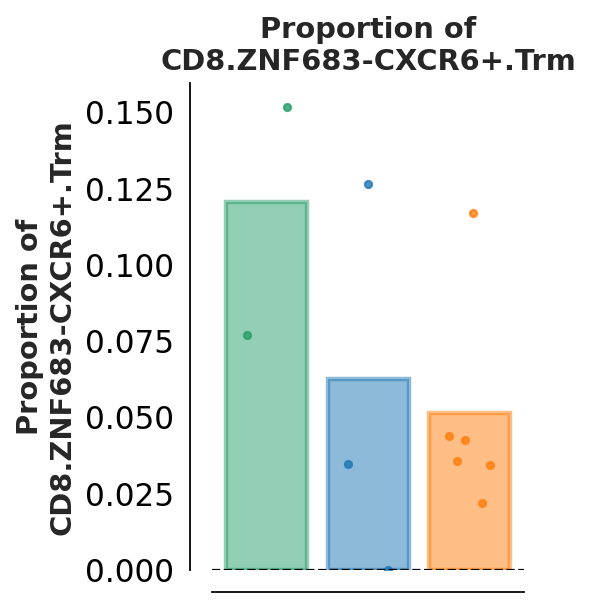

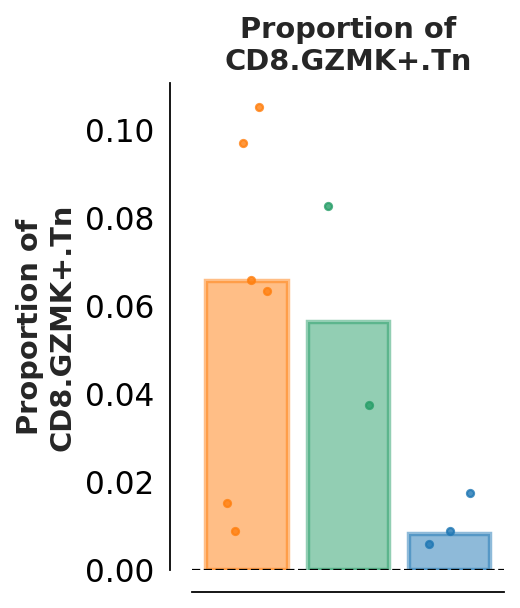

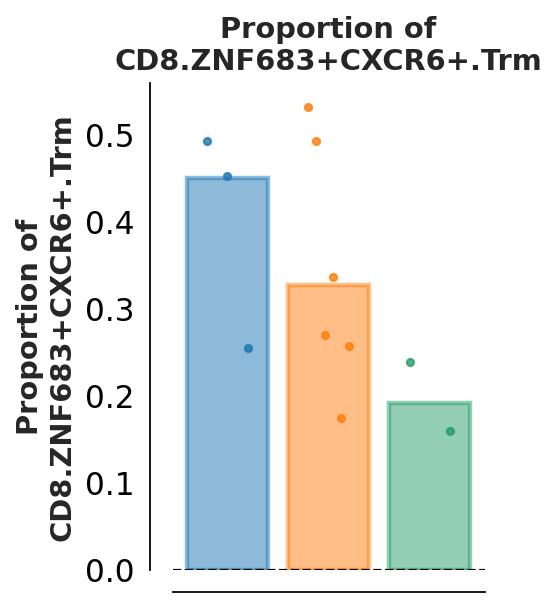

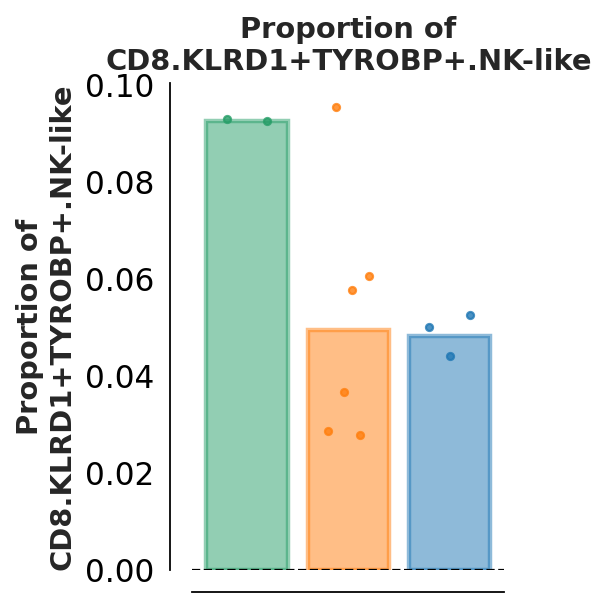

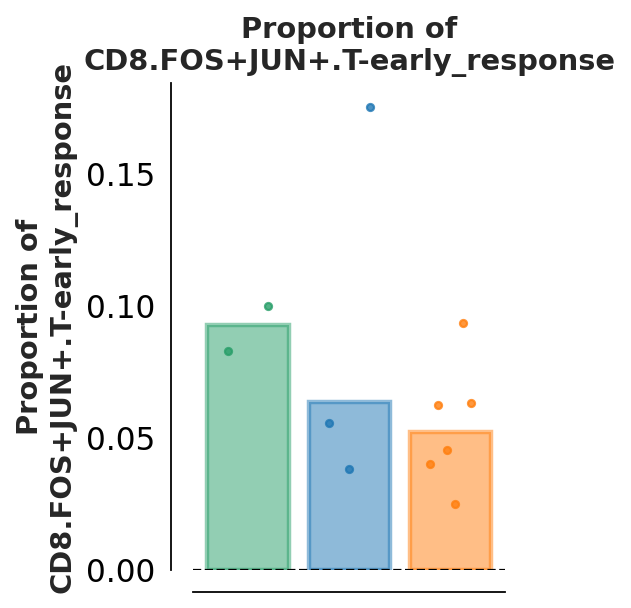

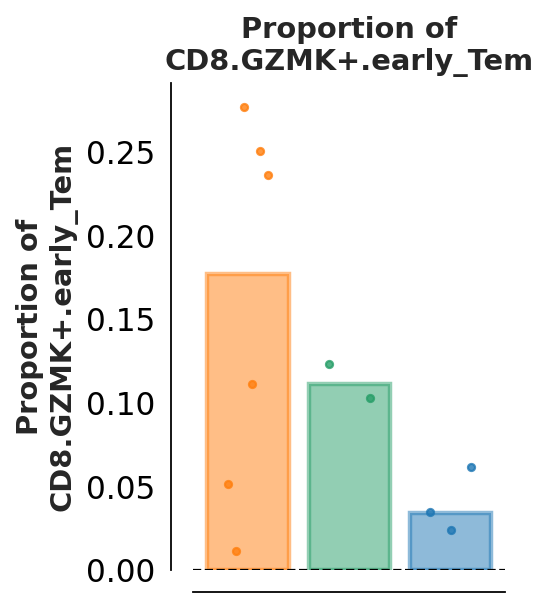

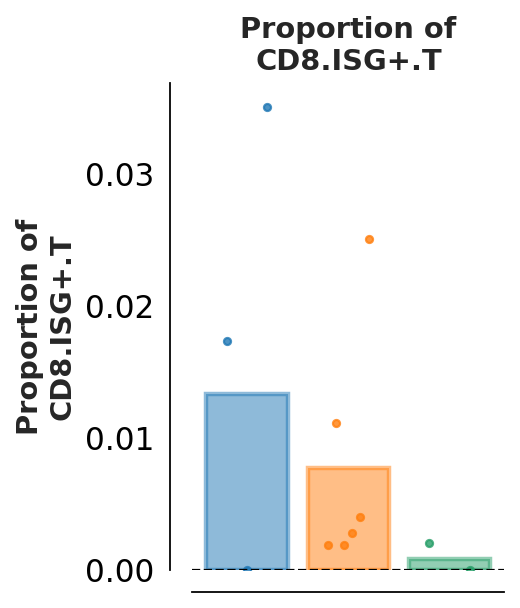

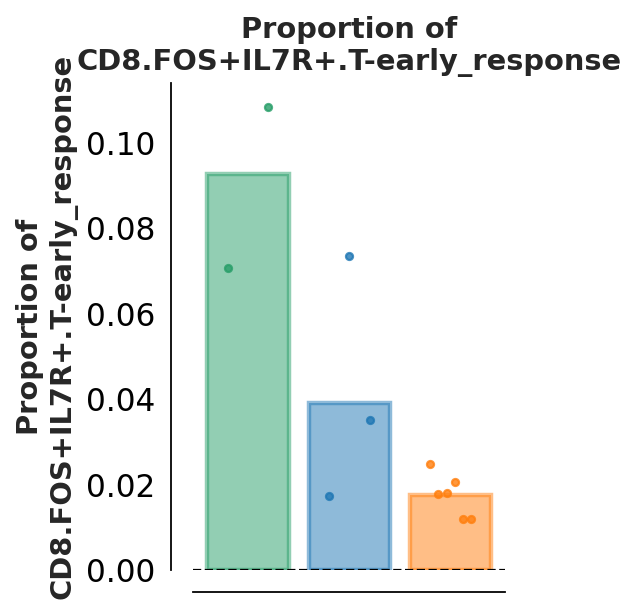

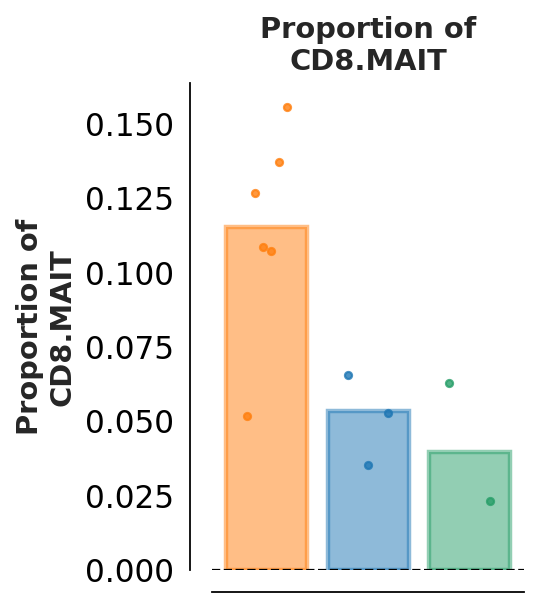

In [266]:
for i in set(adata.obs['Subcelltype']):
    celltype = i
    plot_exhausted_score(adata, groupby='Sample',
                     type_color_rna=type_color_rna,
                     plot_text='Proportion of\n'+celltype,
                     jitter_number=10,
                     values=celltype,
                     x_ticks_plot=False,
                     figsize=(2.5,4),
                     ylabels = 'Proportion of\n'+celltype,
                     ecolor_used=False,
                     save=True,
               #      save_pathway='Gastric/Figure/sFigure4/sFigure4_W.png'
                     )

In [267]:
set(adata.obs['Subcelltype'])

{'CD8.CXCL13+.Termianl_Tex',
 'CD8.FOS+IL7R+.T-early_response',
 'CD8.FOS+JUN+.T-early_response',
 'CD8.GZMK+.Tem',
 'CD8.GZMK+.Tn',
 'CD8.GZMK+.early_Tem',
 'CD8.ISG+.T',
 'CD8.KLRD1+TYROBP+.NK-like',
 'CD8.MAIT',
 'CD8.ZNF683+CXCR6+.Trm',
 'CD8.ZNF683+CXCR6-.Trm',
 'CD8.ZNF683-CXCR6+.Trm'}

In [268]:
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata = adata_CD4
for i in set(adata.obs['Subcelltype']):
    adata.obs[i] = ''
    for j in set(adata.obs['Person']):
            adata.obs.loc[adata.obs['Person']==j,i]=len(adata.obs[(adata.obs['Person']==j)&(adata.obs['Subcelltype']==i)].index)/len(adata.obs[adata.obs['Person']==j].index)

In [269]:
set(adata.obs['Subcelltype'])

{'CD4.CAPG+.Tm',
 'CD4.CAPG+CREM-.Tm',
 'CD4.CXCR5+.pre-Tfh',
 'CD4.IL21+.Tfh',
 'CD4.IL26+.Th17',
 'CD4.LAG3+.Treg',
 'CD4.TNF+.T',
 'CD4.TNFRSF9+.Treg',
 'CD4.TOX2+.Tfh',
 'CD4.Tn',
 'CD4.pre-Tm'}

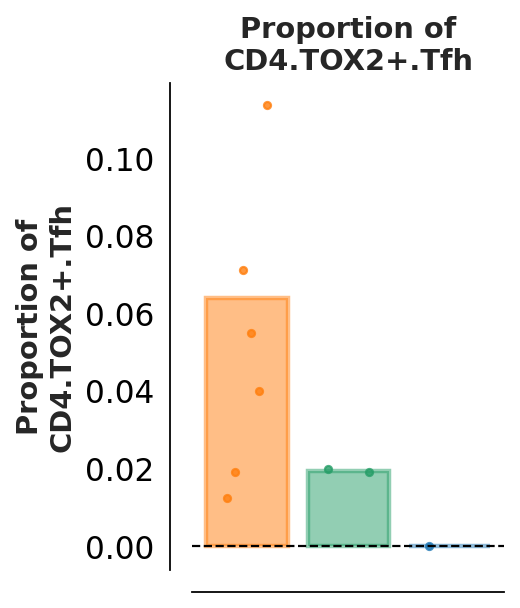

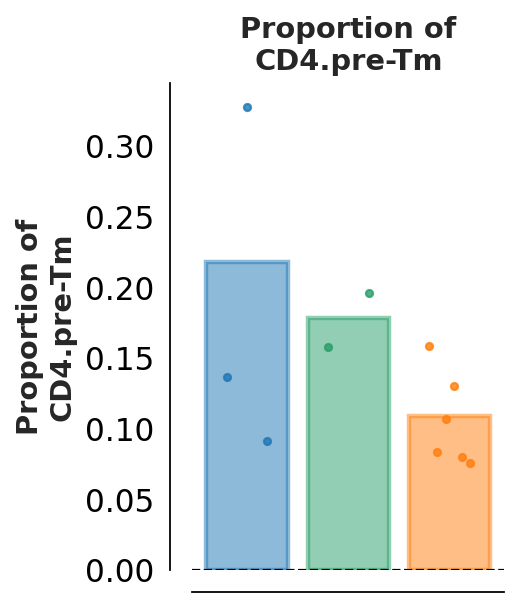

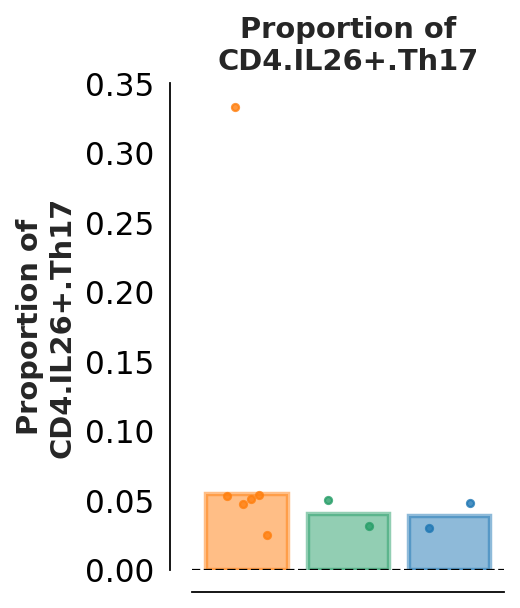

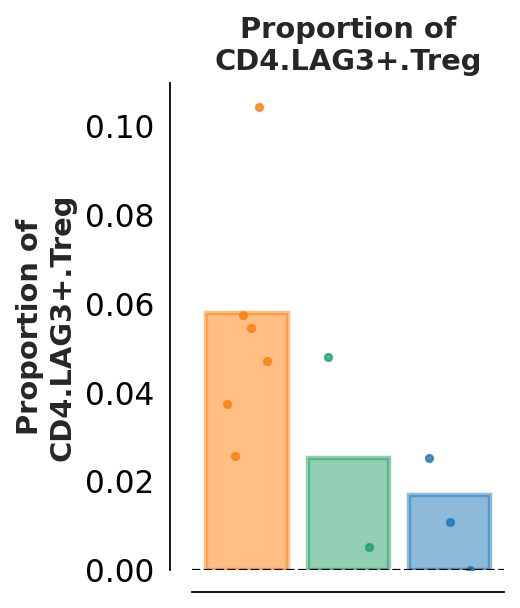

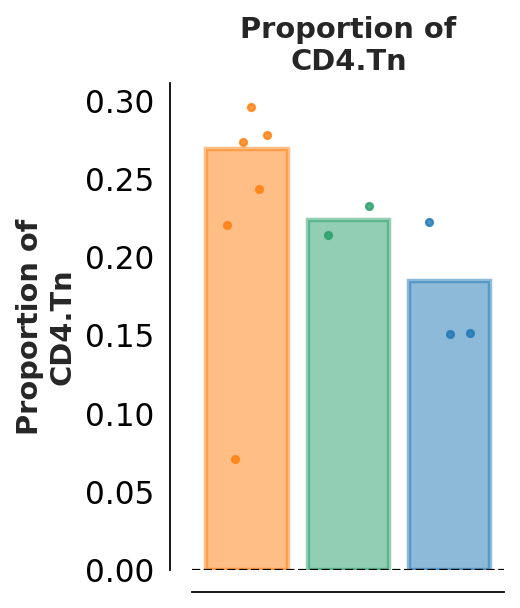

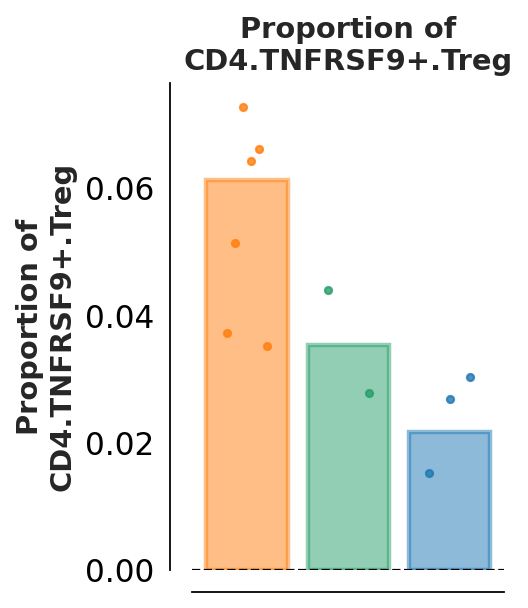

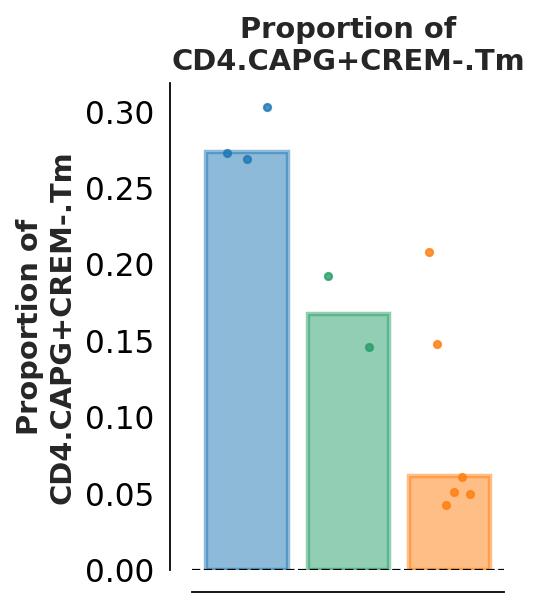

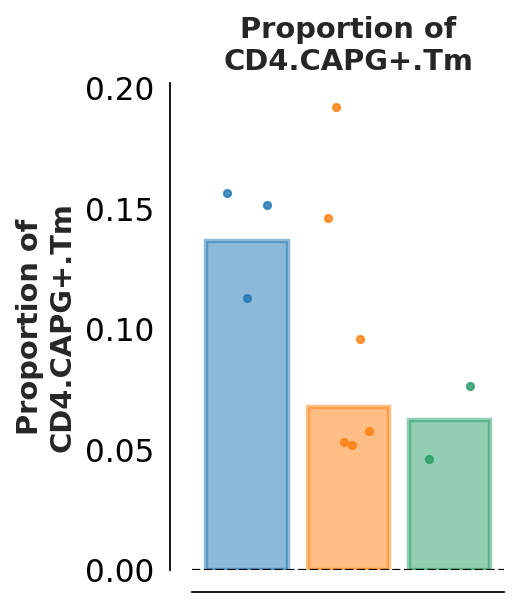

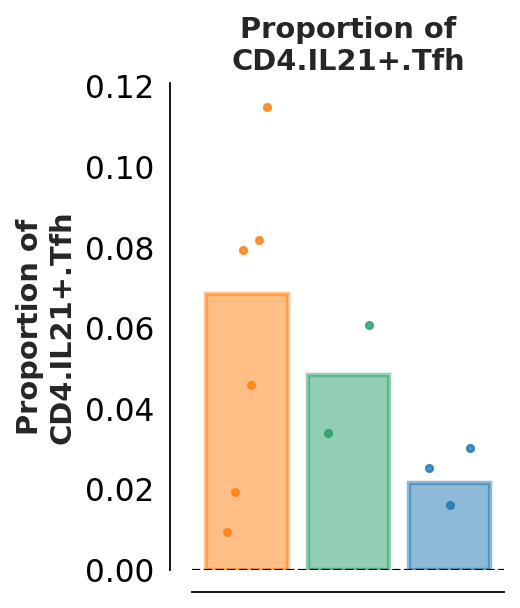

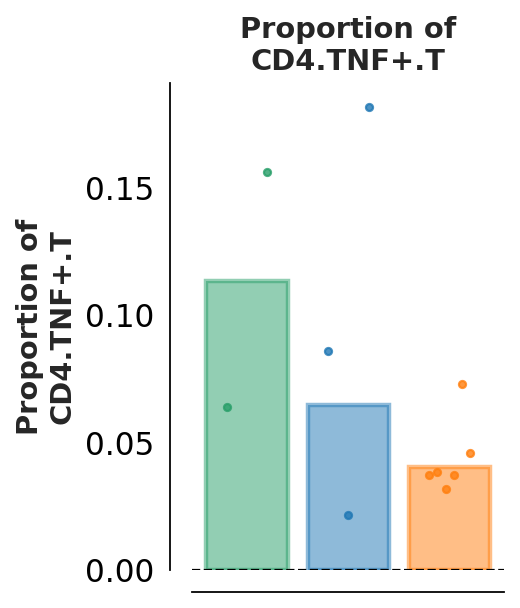

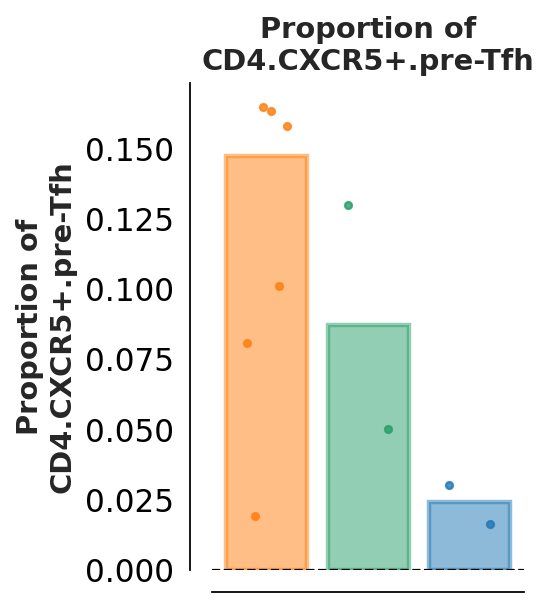

In [270]:
for i in set(adata.obs['Subcelltype']):
    celltype = i
    plot_exhausted_score(adata, groupby='Sample',
                     type_color_rna=type_color_rna,
                     plot_text='Proportion of\n'+celltype,
                     jitter_number=10,
                     values=celltype,
                     x_ticks_plot=False,
                     figsize=(2.5,4),
                     ylabels = 'Proportion of\n'+celltype,
                     ecolor_used=False,
                     save=True,
               #      save_pathway='Gastric/Figure/sFigure4/sFigure4_W.png'
                     )

In [241]:
for i in set(adata_CD8.obs['Subcelltype']):
    print(i)
    print(len(adata_CD8[adata_CD8.obs['Subcelltype']==i].obs_names))

CD8.CXCL13+.Termianl_Tex
125
CD8.ZNF683+CXCR6-.Trm
850
CD8.GZMK+.Tem
393
CD8.ZNF683-CXCR6+.Trm
410
CD8.GZMK+.Tn
339
CD8.ZNF683+CXCR6+.Trm
1982
CD8.FOS+JUN+.T-early_response
382
CD8.GZMK+.early_Tem
877
CD8.ISG+.T
45
CD8.FOS+IL7R+.T-early_response
218
CD8.MAIT
563


In [242]:
for i in set(adata_CD4.obs['Subcelltype']):
    print(i)
    print(len(adata_CD4[adata_CD4.obs['Subcelltype']==i].obs_names))

CD4.TOX2+.Tfh
361
CD4.pre-Tm
864
CD4.IL26+.Th17
349
CD4.LAG3+.Treg
342
CD4.Tn
1748
CD4.TNFRSF9+.Treg
373
CD4.CAPG+CREM-.Tm
619
CD4.CAPG+.Tm
484
CD4.IL21+.Tfh
425
CD4.TNF+.T
364
CD4.CXCR5+.pre-Tfh
887
